In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from util.plotting import *
from util.visualization import *
from NNetwork import NNetwork as nn
from src.supervised_NDL.SNDL import sndl_equalEdge, sndl_predict
from src.sampling.Sampling import sampling_sndl

## Erdos-Renyi
### Load ER

In [2]:
def ER(ntwk, save_path='data/ER_{ntwk}.txt'):
    save_path = save_path.format(ntwk=ntwk)
    G = nx.Graph()
    path = "data/" + str(ntwk) + '.txt'
    edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))
    for e in edgelist:
        G.add_edge(e[0], e[1])

    n = len(G.nodes())
    p = nx.density(G)

    G_er = nx.erdos_renyi_graph(n=n,p=p)
    nx.write_edgelist(G_er, save_path, data=False)

In [3]:
# Example Usage
ER('Caltech36')
ER('Wisconsin87')

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
 !!! The balanced size_list: [100, 139, 7]
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 139
num of subgraphs induced on k-paths: 7
initial loading beta [[-0.25372467  0.06498037  0.02803443 -0.98640238 -0.11933063  0.43103527
   0.55069563  0.48702369 -0.74288734 -0.09117028 -0.50016844  0.2453621
  -0.34451737 -0.2280703   0.33841824 -0.08701818  0.08105226]
 [-0.43915708 -0.05984056 -0.58353557 -0.97803898 -0.48822348  0.83868869
   0.8881196   0.79207683  0.61665537  0.71023453 -0.45037481 -0.21183098
  -0.18591171 -0.85802867 -0.35053629 -0.65118429  0.04031199]]


100%|██████████| 100/100 [00:00<00:00, 136.43it/s]


!!! pred_type filter
!!! FINAL [confusion_mx, Accuracy] =  [array([[314,  32],
       [ 14, 132]]), 0.907]


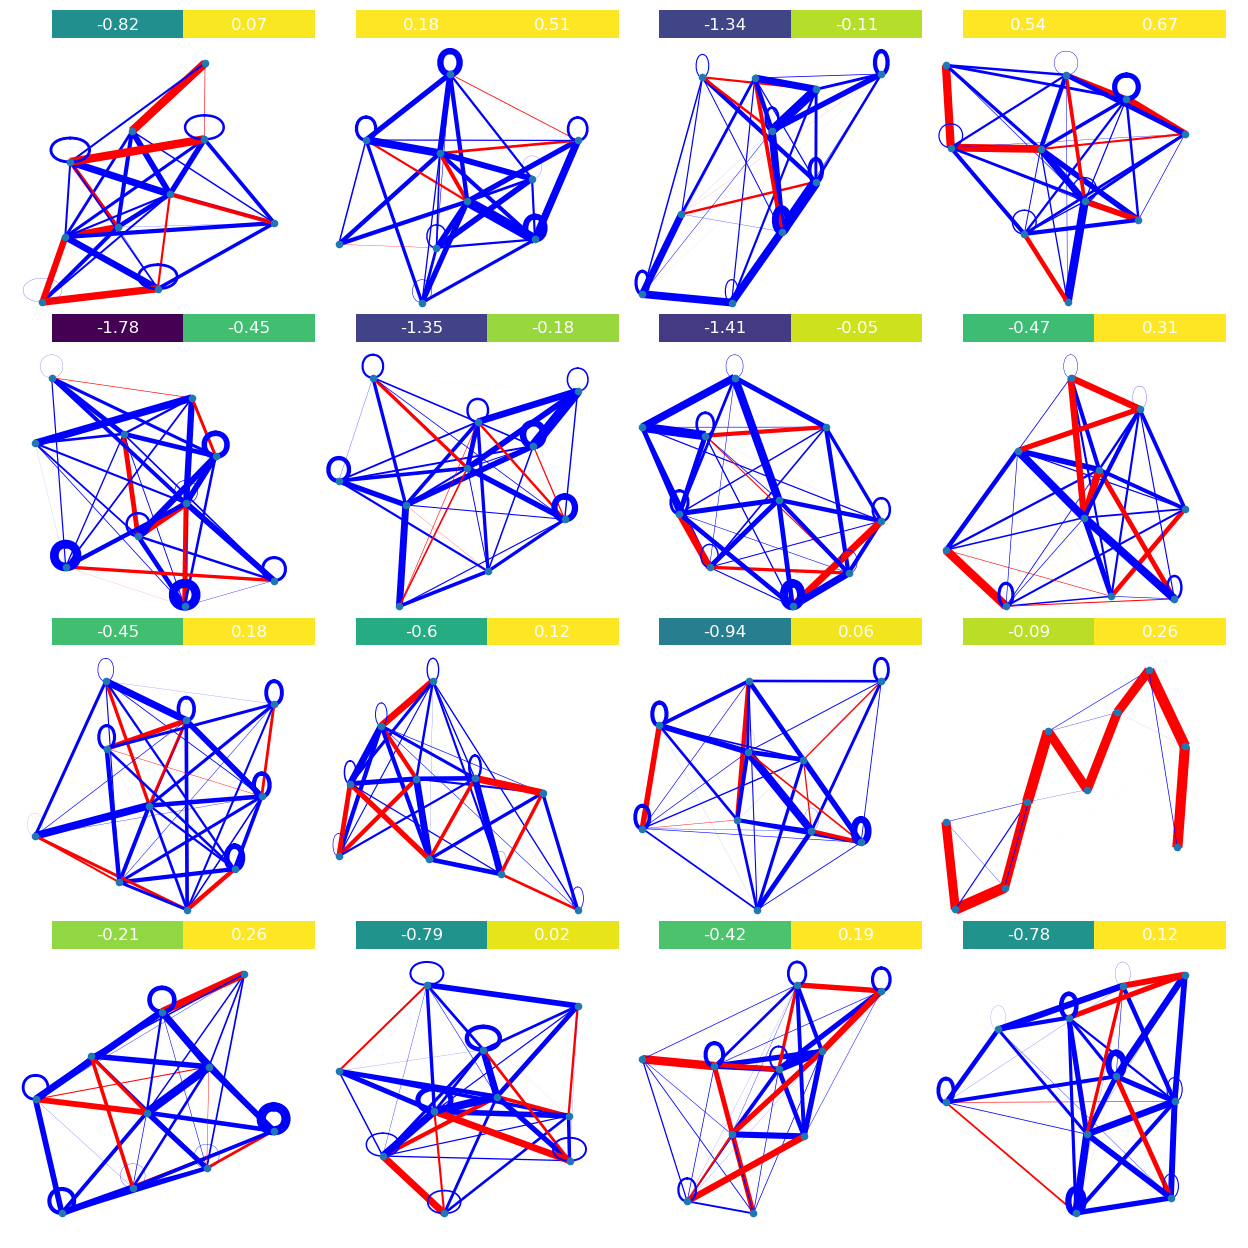

In [4]:
# Visualize dictionaries
ntwk_list = ['Caltech36', 'UCLA26', 'ER_Caltech36']
sampling_alg = 'pivot'
save_folder = 'output/network/'

graph_list = []
for ntwk in ntwk_list:
    path = "data/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)

W, beta, H = sndl_equalEdge(graph_list, base_sample_size=100, k=10, xi=5, n_components=16, iter=100, subsample_number=100,
                            if_validate=False, if_compute_recons_error=False)

display_dict_and_graph(save_path=f'output/figure/Caltech_UCLA_ER^Caltech36', W=W, regression_coeff=beta.T, fig_size=[15,15], plot_graph_only=True)

### Load WS

In [5]:
def WS(ntwk, p=0.1, random_orientation=False, save_path='data/WS_{ntwk}.txt'):
    # Watts-Strogatz model with baseline graph G and edge rewiring probability p 
    # G is undirected. Flip fair coins for each edge of G to get initial orientation.
    # For each oriented edge, resample the head node uniformly at random with probability p, independently. 
    # Do nothing for that edge with probability 1-p. 
    
    save_path = save_path.format(ntwk=ntwk)

    G = nx.Graph()
    path = "data/" + str(ntwk) + '.txt'
    edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))
    for e in edgelist:
        G.add_edge(e[0], e[1])

    # Give random orientation by crea
    if random_orientation: 
        G1 = random_orientation(G)
    else: #G is already a digraph 
        G1 = G

    nodes = list(G1.nodes())
    G_ws = nx.Graph()
    
    for e in G1.edges():
        U = np.random.rand()
        if U < p: 
            i = np.random.choice(np.arange(len(nodes)))
            v = nodes[i]
            G_ws.add_edge(e[0],v)
        else: 
            G_ws.add_edge(e[0],e[1])

    nx.write_edgelist(G_ws, save_path, data=False)

In [6]:
# Example Usage
WS('Caltech36')
WS('Wisconsin87')

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
 !!! The balanced size_list: [100, 142, 7]
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 142
num of subgraphs induced on k-paths: 7
initial loading beta [[-0.32208506 -0.32260297  0.46742281  0.31450965 -0.94653977  0.28242617
   0.08702577 -0.37639819  0.57206     0.15881326 -0.05086909  0.56124225
   0.87681548 -0.44721213 -0.59976887  0.62878913 -0.49336276]
 [ 0.07358656 -0.63829287 -0.94316907 -0.0318732  -0.2693044  -0.13693555
   0.09973534 -0.84317234  0.52373749  0.42859037  0.2529258   0.50678886
  -0.96998382 -0.57602142 -0.54544056  0.29622605  0.68423792]]


 17%|█▋        | 17/100 [00:00<00:00, 162.47it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[316,  33],
       [  9, 140]]), 0.916]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[316,  33],
       [  9, 140]]), 0.916]


 34%|███▍      | 34/100 [00:00<00:00, 143.01it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[316,  33],
       [  9, 140]]), 0.916]


 49%|████▉     | 49/100 [00:00<00:00, 135.40it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[316,  33],
       [  9, 140]]), 0.916]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[316,  33],
       [  9, 140]]), 0.916]


 63%|██████▎   | 63/100 [00:00<00:00, 136.76it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[316,  33],
       [  9, 140]]), 0.916]


 79%|███████▉  | 79/100 [00:00<00:00, 144.30it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[316,  33],
       [  9, 140]]), 0.916]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[316,  33],
       [  9, 140]]), 0.916]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[316,  33],
       [  9, 140]]), 0.916]


100%|██████████| 100/100 [00:00<00:00, 143.43it/s]

!!! pred_type filter


!!! FINAL [confusion_mx, Accuracy] =  [array([[316,  33],
       [  9, 140]]), 0.916]


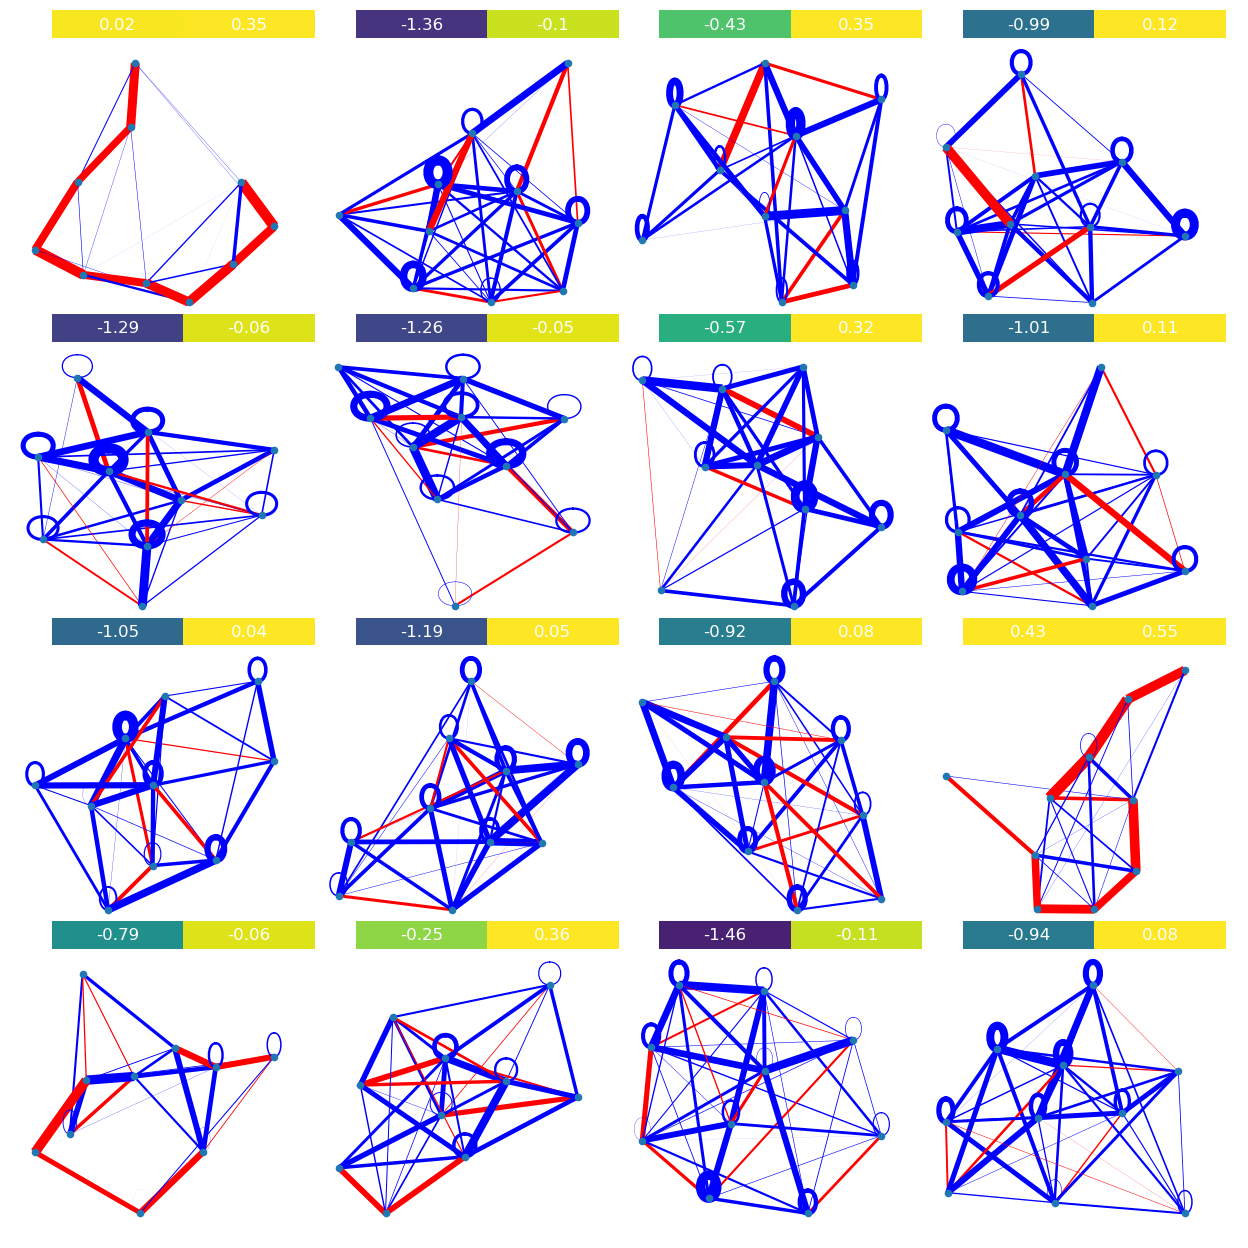

In [7]:
# Visualize dictionaries
ntwk_list = ['Caltech36', 'UCLA26', 'WS_Caltech36']
sampling_alg = 'pivot'
save_folder = 'output/network/'

graph_list = []
for ntwk in ntwk_list:
    path = "data/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)

W, beta, H = sndl_equalEdge(graph_list, base_sample_size=100, k=10, xi=5, n_components=16, iter = 100, subsample_number=100,
                            if_validate=True, if_compute_recons_error=False)

display_dict_and_graph(save_path=f'output/figure/Caltech_UCLA_WS^Caltech36', W=W, regression_coeff=beta.T, fig_size=[15,15], plot_graph_only=True)

## Barabasi-Albert (preferential attachment)

### Load BA

In [8]:
def BA(ntwk, m0=1, m=1, n=100, alpha=1, save_path='data/BA_{ntwk}.txt'):
    # Barabasi-Albert model with baseline graph G = single node with m0 self-loops 
    # Each new node has m edges pointing to some nodes in the existing graph 
    # alpha=1 -> preferential attachment: The head of each new directed edge is chosen randomly with probability 
    # proportional to the degree
    # alpha=0 ->: Uniform attachment: The head of each new directed edge is chosen uniformly at random
    # alpha \notin\{0,1} -> nonlinear preferential attachment: The head of each new directed edge is chosen 
    # randomly with probability proportional to the degree^alpha
    
    save_path = save_path.format(ntwk=ntwk)

    G0 = nx.Graph()
    path = "data/" + str(ntwk) + '.txt'
    edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))
    for e in edgelist:
        G0.add_edge(e[0], e[1])

    if G0 is not None: 
        G_ba = G0
    else: 
        G_ba = nx.MultiGraph() # baseline graph with a single node and m0 self-loops 
        for i in np.arange(m0):
            G_ba.add_edge(1,1)
        
    for s in np.arange(1,n):
        for j in np.arange(m):
            # form a degree distribution 
            degrees = np.asarray([G_ba.degree(n)**(alpha) for n in G_ba.nodes()])
            deg_dist = degrees*(1/np.sum(degrees))
            v = np.random.choice(G_ba.nodes(), p=deg_dist)
            G_ba.add_edge(s,v)

    nx.write_edgelist(G_ba, save_path, data=False)

In [9]:
# Example Usage
BA('Caltech36')
BA('Wisconsin87')

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
 !!! The balanced size_list: [100, 151, 8]
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 151
num of subgraphs induced on k-paths: 8
initial loading beta [[ 0.94144147 -0.30934596 -0.90089391  0.04067215  0.39907975 -0.45655921
  -0.06143646  0.1573684  -0.68195103  0.82642913  0.30681126 -0.22876023
   0.43182209 -0.10116202 -0.11503927 -0.2006472  -0.72214878]
 [ 0.56051369 -0.46738477 -0.32916696 -0.1088459  -0.24730293 -0.23768536
  -0.8213136  -0.62038204 -0.68554143  0.56506007  0.372651   -0.65428946
   0.40972    -0.3849311  -0.65301967  0.59687256  0.23976655]]


  8%|▊         | 8/100 [00:00<00:01, 75.80it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[332,  27],
       [ 15, 144]]), 0.919]


 30%|███       | 30/100 [00:00<00:00, 92.38it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[331,  28],
       [ 15, 144]]), 0.917]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[330,  29],
       [ 15, 144]]), 0.915]


 40%|████      | 40/100 [00:00<00:00, 78.40it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[330,  29],
       [ 14, 145]]), 0.917]


 57%|█████▋    | 57/100 [00:00<00:00, 75.34it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[331,  28],
       [ 14, 145]]), 0.919]


 67%|██████▋   | 67/100 [00:00<00:00, 80.76it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[331,  28],
       [ 13, 146]]), 0.921]


 77%|███████▋  | 77/100 [00:00<00:00, 83.98it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[331,  28],
       [ 13, 146]]), 0.921]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[331,  28],
       [ 13, 146]]), 0.921]


 94%|█████████▍| 94/100 [00:01<00:00, 75.20it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[331,  28],
       [ 13, 146]]), 0.921]


100%|██████████| 100/100 [00:01<00:00, 72.51it/s]


!!! pred_type filter
!!! FINAL [confusion_mx, Accuracy] =  [array([[331,  28],
       [ 13, 146]]), 0.921]


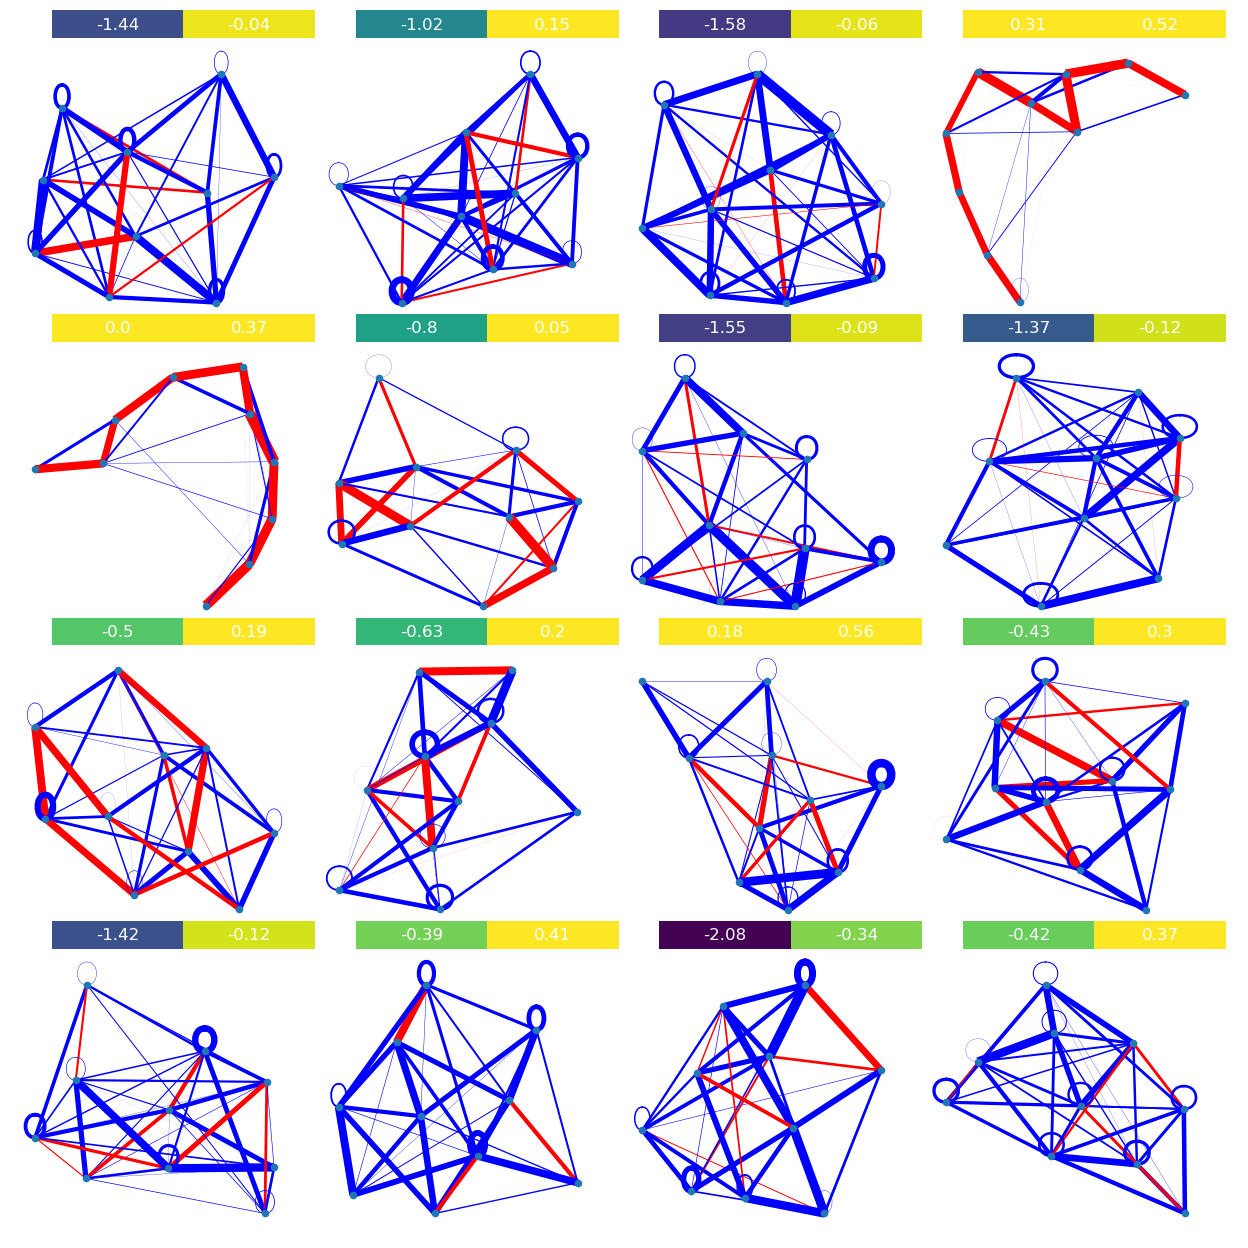

In [10]:
# Visualize dictionaries
ntwk_list = ['Caltech36', 'UCLA26', 'BA_Caltech36']
sampling_alg = 'pivot'
save_folder = 'output/network/'

graph_list = []
for ntwk in ntwk_list:
    path = "data/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)

W, beta, H = sndl_equalEdge(graph_list, base_sample_size=100, k=10, xi=5, n_components=16, iter = 100, subsample_number=100,
                            if_validate=True, if_compute_recons_error=False)

display_dict_and_graph(save_path=f'output/figure/Caltech_UCLA_BA^Caltech36', W=W, regression_coeff=beta.T, fig_size=[15,15], plot_graph_only=True)

## Confinguration model

### Load CM

In [11]:
def CM(ntwk, save_path='data/CM_{ntwk}.txt'):
    # Configuration model with degree sequence d = [d1, ... , dn] (a list or array)
    # di \ge 0 and sum to even 
    
    save_path = save_path.format(ntwk=ntwk)

    G0 = nx.Graph()
    path = "data/" + str(ntwk) + '.txt'
    edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))
    for e in edgelist:
        G0.add_edge(e[0], e[1])

    degrees = [G0.degree(v) for v in G0.nodes()]

    d = list(degrees)
    stubs_list = []
    for i in np.arange(len(d)):
        for j in np.arange(d[i]):
            stubs_list.append([i,j])

    G_cm = nx.MultiGraph()
    while len(stubs_list)>0:
        ss = np.random.choice(np.asarray(len(stubs_list)), 2, replace=False)
        s1 = ss[0]
        s2 = ss[1]
        half_edge1 = stubs_list[s1]
        half_edge2 = stubs_list[s2]
        G_cm.add_edge(half_edge1[0], half_edge2[0])
        stubs_list.remove(half_edge1)
        if s1 != s2:
            stubs_list.remove(half_edge2)
                    
    nx.write_edgelist(G_cm, save_path, data=False)

In [12]:
# Example Usage
CM('Caltech36')

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
 !!! The balanced size_list: [100, 144, 7]
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 144
num of subgraphs induced on k-paths: 7
initial loading beta [[ 0.16957972 -0.06567498 -0.2754489  -0.40964    -0.30201237 -0.76638751
   0.03996464  0.13399903 -0.62858229 -0.98488867  0.82661646 -0.10376221
  -0.49158748  0.35620626  0.28616156  0.97648397  0.5708254 ]
 [-0.59652391  0.02533536  0.14305159  0.3006693   0.60511494  0.0319107
  -0.78845544 -0.14992355 -0.57600623 -0.1146718   0.22288299  0.46134547
   0.49494286 -0.17940389  0.48887227  0.57994412 -0.42147265]]


 16%|█▌        | 16/100 [00:00<00:00, 159.03it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[321,  30],
       [ 15, 136]]), 0.91]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[321,  30],
       [ 15, 136]]), 0.91]


 32%|███▏      | 32/100 [00:00<00:00, 146.36it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[320,  31],
       [ 15, 136]]), 0.908]


 47%|████▋     | 47/100 [00:00<00:00, 137.67it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[321,  30],
       [ 15, 136]]), 0.91]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[321,  30],
       [ 15, 136]]), 0.91]


 61%|██████    | 61/100 [00:00<00:00, 133.05it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[321,  30],
       [ 15, 136]]), 0.91]


 76%|███████▌  | 76/100 [00:00<00:00, 135.63it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[321,  30],
       [ 15, 136]]), 0.91]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[322,  29],
       [ 15, 136]]), 0.912]


 90%|█████████ | 90/100 [00:00<00:00, 134.40it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[322,  29],
       [ 15, 136]]), 0.912]


100%|██████████| 100/100 [00:00<00:00, 135.56it/s]


!!! pred_type filter
!!! FINAL [confusion_mx, Accuracy] =  [array([[322,  29],
       [ 15, 136]]), 0.912]


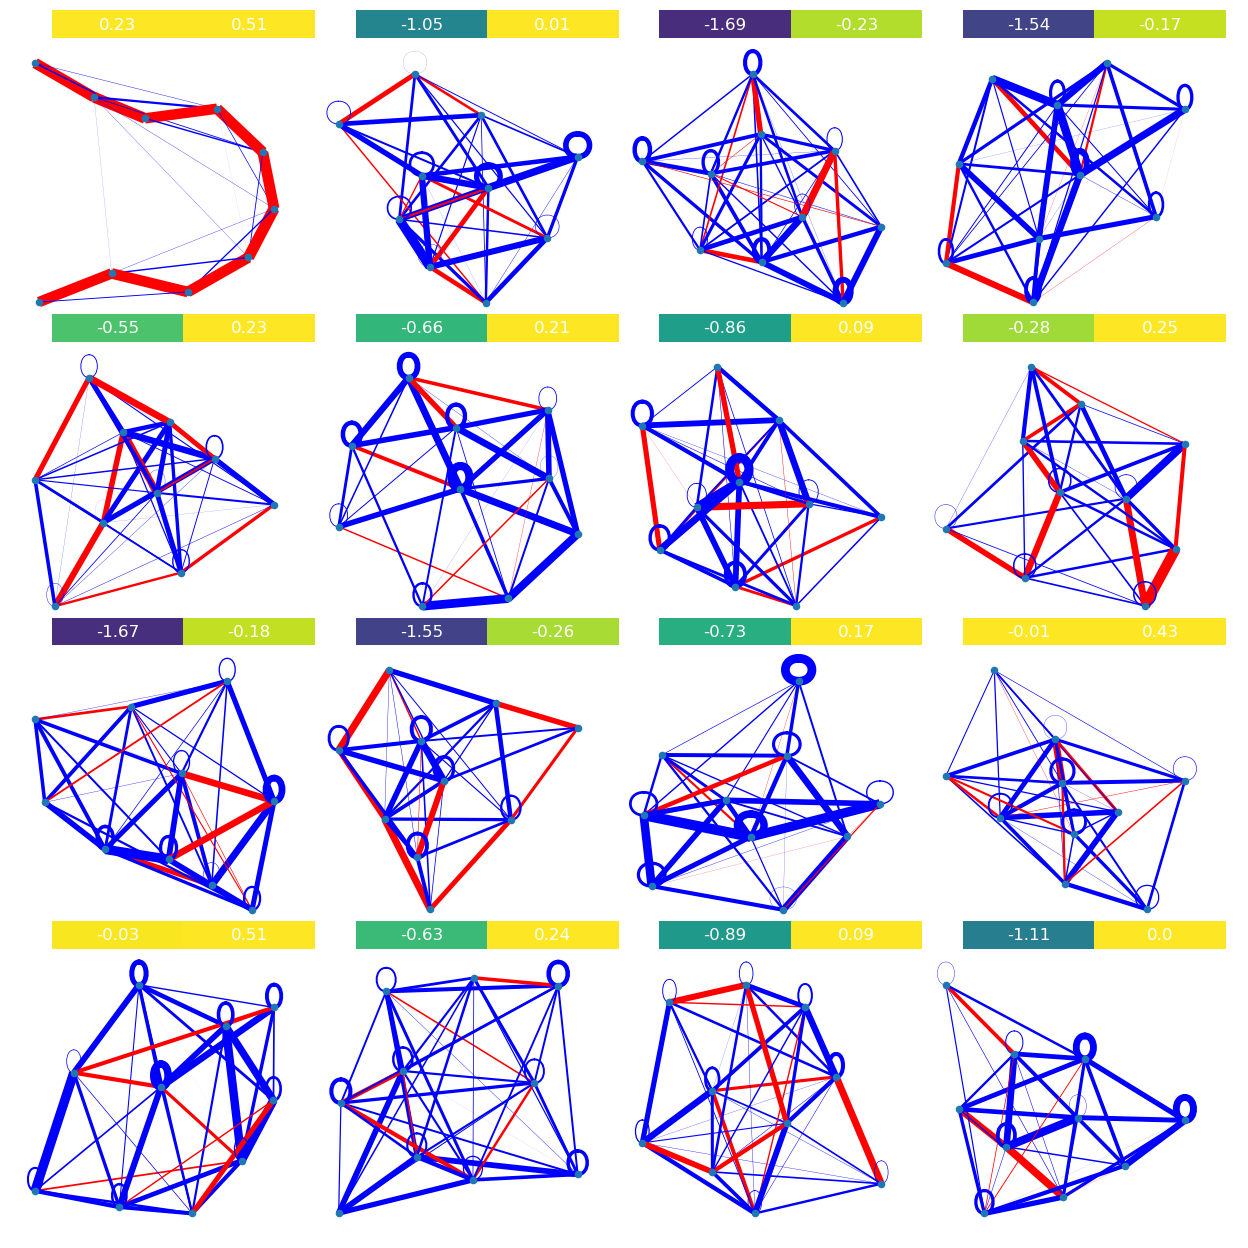

In [13]:
# Visualize dictionaries
ntwk_list = ['Caltech36', 'UCLA26', 'CM_Caltech36']
sampling_alg = 'pivot'
save_folder = 'output/network/'

graph_list = []
for ntwk in ntwk_list:
    path = "data/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)

W, beta, H = sndl_equalEdge(graph_list, base_sample_size=100, k=10, xi=5, n_components=16, iter = 100, subsample_number=100,
                            if_validate=True, if_compute_recons_error=False)

display_dict_and_graph(save_path=f'output/figure/Caltech_UCLA_CM^Caltech36', W=W, regression_coeff=beta.T, fig_size=[15,15], plot_graph_only=True)